In [1]:
from caret_analyze import Architecture, Lttng, Application
from caret_analyze.plot import chain_latency, Plot

arch = Architecture('yaml', './architecture_path.yaml')
lttng = Lttng('/home/atsushi22/.ros/tracing/autoware_launch_trace_20230308-062832')
app = Application(arch, lttng)

Succeed to find record_cpp_impl. the C++ version will be used.
591635 events found.


loading: 100%|██████████| 591635/591635 [00:16<00:00, 35546.09it/s]


Loading BokehJS ...

============ control ============


Mim latency: 31.183362
Ave latency: 211.57872083653848
Max latency: 283.121235


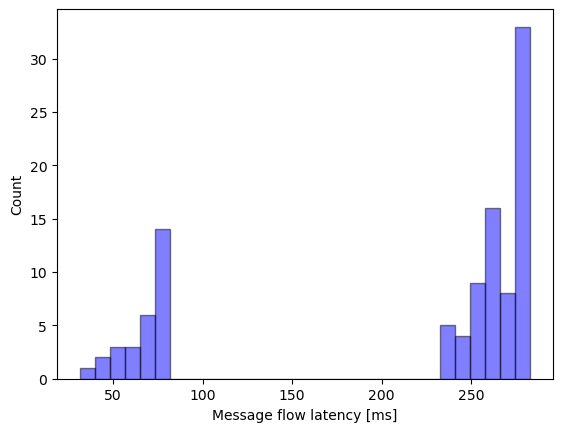

============ ekf_accel ============


Mim latency: 3.387413
Ave latency: 115.06390571578946
Max latency: 573.3471079999999


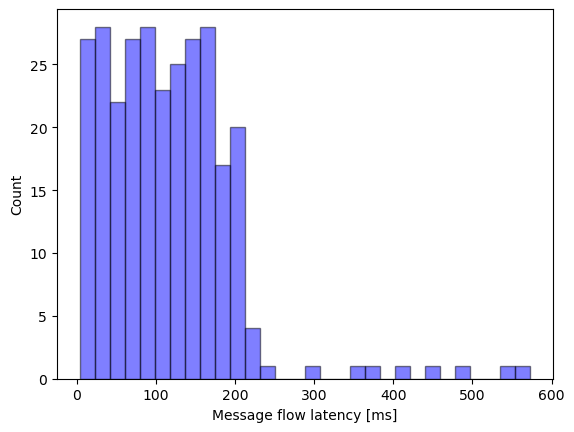

============ end_to_end ============


Mim latency: 103.545694
Ave latency: 312.29038106776187
Max latency: 810.358692


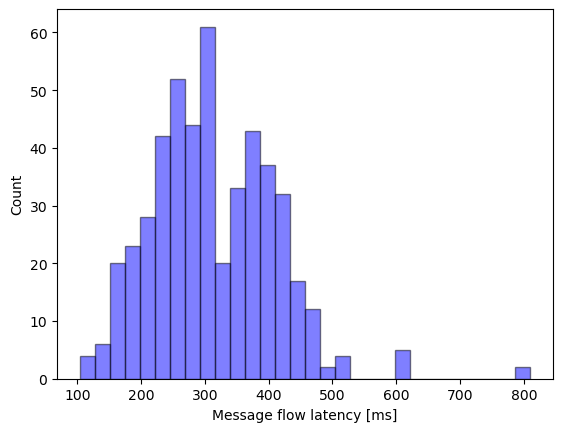

============ perception ============


Mim latency: 74.432437
Ave latency: 267.43156136697246
Max latency: 726.376867


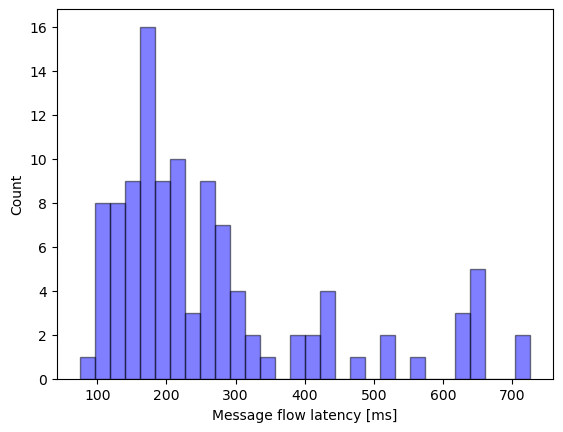

============ planning ============


Mim latency: 9.685191999999999
Ave latency: 13.85359758974359
Max latency: 28.560836


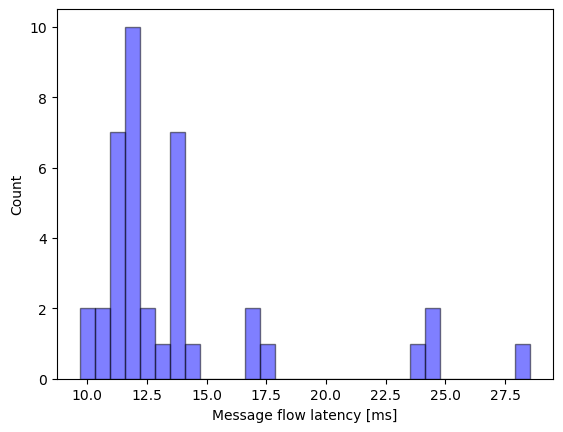

============ velodyne_ndt ============


Mim latency: 38.087329
Ave latency: 59.22532347826086
Max latency: 90.98239199999999


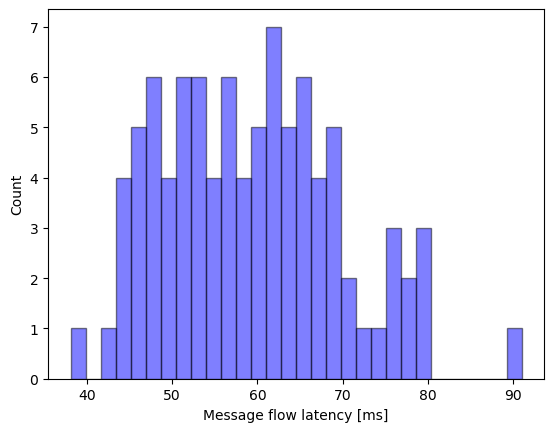

In [2]:
from caret_analyze.plot import message_flow
from bokeh.plotting import output_notebook
import numpy as np
import matplotlib.pyplot as plt
output_notebook()

for path in app.paths:
    print(f'============ {path.path_name} ============')
    _, latencies = message_flow(path, treat_drop_as_delay=True, lstrip_s=20, rstrip_s=20)

    latencies_np = np.array(latencies)
    print(f"Mim latency: {latencies_np.min()}")
    print(f"Ave latency: {latencies_np.mean()}")
    print(f"Max latency: {latencies_np.max()}")
    plt.hist(latencies_np, bins=30, color='blue', edgecolor='black', alpha=0.5)

    plt.xlabel('Message flow latency [ms]')
    plt.ylabel('Count')
    plt.show()